In [66]:
import os
import sys
import subprocess
from cambrian import Dataset
from uuid import uuid1
import h5py
import numpy as np
from PIL import Image

In [22]:
# class for test definition
class attr():
    token = 'test'
    dataset_name = 'example' + str(uuid1())[:10]
    test_file = [('test.h5', 100*1024*1024)]


def gen_test_file(filename, size):
    if os.path.exists(filename):
        print("{} already exists, skip create test file.".format(filename))
    else:
        subprocess.run(["dd", "if=/dev/zero", "of={outputFile}".format(outputFile=filename), \
                        "bs={bytes}".format(bytes=size), "count=1", \
                       ], \
                       check=True)
        print("{} size {} created.".format(filename, size))


def callback(progressObj):
    print(progressObj.bytes_read)
    print(progressObj.current_time)


# if __name__ == '__main__':
#     ds = Dataset("http://172.18.212.216:31597")
#     for file_obj in attr.test_file:
#         gen_test_file(file_obj[0], file_obj[1])
#         # add(), upload a private dataset
#         ret = ds.add(file_obj[0], attr.token, attr.dataset_name, "private", callback=callback)
#         if ret is None:
#             print("add {} error.".format(file_obj))
#             sys.exit(1)
#         dataset_token = ret.get('datasetToken', None)
#         print("Add dataset success, id({})".format(dataset_token))

#         get_filename = 'download_{}'.format(file_obj[0])
#         # remove filename to be download to if it exists
#         if os.path.exists(get_filename):
#             os.remove(get_filename)
#         # get(), download a dataset to local
#         ret = ds.get(dataset_token, attr.token, get_filename)
#         if ret is not None:
#             print("Download id({}) to {} success".format(dataset_token, ret))
#         # delete(), remove a dataset in dataset store
#         ret = ds.delete(dataset_token, attr.token)
#         print("delete() response:{}".format(ret))


In [27]:
file_obj = attr.test_file[0]

In [28]:
gen_test_file(file_obj[0], file_obj[1])

test.h5 already exists, skip create test file.


In [2]:
ds = Dataset()

In [48]:
ret = ds.add(filename=file_obj[0], token=attr.token, name=attr.dataset_name, visible="private",
             creator='gallon_shih', callback=callback)

Exception: visible:None is invalid, require ['public', 'private']

In [31]:
if ret is None:
    print("add {} error.".format(file_obj))
    sys.exit(1)
dataset_token = ret.get('datasetToken', None)
print("Add dataset success, id({})".format(dataset_token))

Add dataset success, id(e7554025a0fa8363f606e81f08c13088)


In [33]:
get_filename = 'download_{}'.format(file_obj[0])
if os.path.exists(get_filename):
    print(1)
    os.remove(get_filename)

In [34]:
get_filename

'download_test.h5'

In [38]:
# get(), download a dataset to local
ret = ds.get(dataset_token, attr.token, get_filename)

In [39]:
ret

'download_test.h5'

In [42]:
dataset_token

'e7554025a0fa8363f606e81f08c13088'

In [37]:
if ret is not None:
    print("Download id({}) to {} success".format(dataset_token, ret))
# delete(), remove a dataset in dataset store
ret = ds.delete(user_name='gallon_shih', dataset_token=dataset_token, token=attr.token)
print("delete() response:{}".format(ret))

Download id(e7554025a0fa8363f606e81f08c13088) to download_test.h5 success
delete() response:{'status': 'fail', 'deleted': [], 'error': [{'token': 'test', 'datasetToken': 'e7554025a0fa8363f606e81f08c13088', 'version': 'None', 'status': 'fail', 'error': 'fail to get storage path in DB.'}]}


In [58]:
ret = ds.delete(user_name='cambrian_dvc', dataset_token=dataset_token, token=attr.token, version='1')
print("delete() response:{}".format(ret))

delete() response:{'status': 'success', 'deleted': ['e7554025a0fa8363f606e81f08c13088'], 'error': []}


In [51]:
ret = ds.get_info(dataset_token=dataset_token, token=attr.token, version=None)
print("get_info() response:{}".format(ret))

get_info() response:(True, <Response [200]>, None)


In [54]:
ret[1].text

'{"request":"success","url":"http://172.18.212.210:14000/webhdfs/v1/cambrian/DatasetMgrTest/test/example13680630-2/1/test.h5?op=OPEN&offset=0&user.name=cambrian_dvc","filename":"test.h5","size":104857600,"version":"1","path":null,"storage_type":"HDFS"}\n'

In [56]:
# ds = Dataset()
# query available public dataset
print("Public:{}".format(ds.get_public_dataset()))
# query available private dataset for token 'test'
print("Private:{}".format(ds.get_private_dataset('test')))
# query all available public/private dataset for token 'test'
print("All:{}".format(ds.get_all_dataset('test')))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [32]:
ds.get_private_dataset('d45267baeccc084b608f455ab870774e')

{}

In [35]:
ds = Dataset()

In [38]:
import base64
image = Image.open("DSR800_20230628013301_237383230002801_FAIL_D50_0_1_0_1.jpg")

In [39]:
image.tobytes()

b'7KL7KL0EF.CD+@A,AB&;<*?@\'9;%79%34$23$00%11\x1e-*\x0f\x1b\x19\x06\x0f\x0c\x08\x0e\x0c\x07\r\x0b\x07\r\x0b\x06\x0c\n\x06\x0c\n\x06\n\t\x06\n\t\x06\n\t\x06\n\t\x0c\x0e\x0b\n\x0c\t\x0b\x0c\x07\r\x0e\t\x0e\x0f\n\x14\x15\x10\x1a\x1b\x15\x1a\x1b\x15\x13\x14\x0f\x13\x14\x0f\x13\x13\x11\x11\x11\x0f\x12\x12\x10\x0e\x0e\x0c\x10\x10\x0e\x11\x11\x0f\x11\x11\x0f\x16\x16\x14\x11\x12\r\x11\x12\r\x11\x12\x0c\x16\x17\x12\x12\x14\x11\x0f\x11\x10\x0c\x0e\r\x0e\x10\x0f\x10\x12\x0f\x17\x19\x16\x14\x16\x13\x16\x18\x15\x10\x12\x0f\x0f\x11\x0e\t\x0b\x08\x13\x15\x12\x1c\x1e\x1b\x13\x15\x12\x1a\x1c\x19\x10\x15\x11\x16\x1f\x1c\x0b\x16\x12\t\x14\x10\x08\x13\x0f\x07\x12\x0c\t\x14\x0e\n\x15\x0f\x0b\x16\x10\x0c\x17\x11\x07\x12\x0c\x0b\x16\x0e\x05\x10\x08\x06\x10\x08\n\x14\x0c\x0c\x16\x0e\x0c\x16\x0e\x0b\x16\x10\x10\x1b\x15\n\x15\x0f\x08\x13\r\x10\x1b\x15\t\x14\x0e\x0b\x18\x11\x10\x1d\x16\n\x17\x10\x0c\x19\x12\n\x19\x12\r\x1c\x15\x10\x1f\x18\x0c\x1b\x14\x12!\x1a\x0c\x1b\x14\x0c\x17\x13\x0b\x16\x12\x0c\x17\x13\x0e\x

In [36]:
import base64
image = Image.open("DSR800_20230628013301_237383230002801_FAIL_D50_0_1_0_1.jpg")
# 將圖片轉換為NumPy數組
image_array1 = image.tobytes()

# 創建H5文件
with h5py.File("input_picture.h5", "w") as f:
    # 創建數據集
    dataset = f.create_dataset("meta-dataset", data=image_array1)

In [48]:
meta_data={
                 "general":{
                    "image_count": {
                    "train": 2,
                    "validate": 3,
                    "test": 4
                  },
                  "labeled_image_count": 4,
                  "unlabeled_image_count": 5,
                  "sample_count": {
                    "train": 2,
                    "validate": 3,
                    "test": 4
                  },
                  "labeled_sample_count": 9,
                  "unlabeled_sample_count": 10,
                  "description": "tag test v11",
                  "project_token": "d45267baeccc084b608f455ab870774e",
                  "dataset_type": [
                    "image"
                  ]
                 },
                 "image": {
                  "color_type": "Binary",
                  "image_dataset_format": "Binary",
                  "image_resolution": {
                    "224x224": 12
                  }
                },
                 "label": {
                     "label_type": [
                         "classification",
                         "gradio"
                    ]
                    },
                 "misc": {
                    "creator": "gallon_shih",
                     "job_id": 0,
                     "job_name": "",
                     "resize": "none"
                  }
             }

In [40]:
ret = ds.add(filename='input_picture.h5', token='d45267baeccc084b608f455ab870774e', name='input_picture_v11', visible="private",
             meta={
                 "general":{
                    "image_count": {
                    "train": 1,
                    "validate": 2,
                    "test": 3
                  },
                  "labeled_image_count": 4,
                  "unlabeled_image_count": 5,
                  "sample_count": {
                    "train": 6,
                    "validate": 7,
                    "test": 8
                  },
                  "labeled_sample_count": 9,
                  "unlabeled_sample_count": 10,
                  "description": "tag test v11",
                  "project_token": "d45267baeccc084b608f455ab870774e",
                  "dataset_type": [
                    "image"
                  ]
                 },
                 "image": {
                  "color_type": "Binary",
                  "image_dataset_format": "Binary",
                  "image_resolution": {
                    "224x224": 12
                  }
                },
                 "label": {
                     "label_type": [
                         "classification",
                         "gradio"
                    ]
                    },
                 "misc": {
                    "creator": "gallon_shih",
                     "job_id": 0,
                     "job_name": "",
                     "resize": "none"
                  }
             }
            )

2023-07-20 01:29:56,356 - cambrian.dataset/INFO - Use meta:{"general": {"image_count": {"train": 1, "validate": 2, "test": 3}, "labeled_image_count": 4, "unlabeled_image_count": 5, "sample_count": {"train": 6, "validate": 7, "test": 8}, "labeled_sample_count": 9, "unlabeled_sample_count": 10, "description": "tag test v11", "project_token": "d45267baeccc084b608f455ab870774e", "dataset_type": ["image"]}, "image": {"color_type": "Binary", "image_dataset_format": "Binary", "image_resolution": {"224x224": 12}}, "label": {"label_type": ["classification", "gradio"]}, "misc": {"creator": "gallon_shih", "job_id": 0, "job_name": "", "resize": "none"}}
2023-07-20 01:29:57,541 - cambrian.dataset/INFO - EOF uploaded dataset


In [41]:
ret

{'request': 'success',
 'datasetToken': '9f556655cd70ac3912d0ec67e5a34e6a',
 'version': 1,
 'size': 202800}

In [50]:
ret = ds.update(filename='input_picture.h5', dataset_token='9f556655cd70ac3912d0ec67e5a34e6a',
            token='d45267baeccc084b608f455ab870774e',
            meta=meta_data,
            overwrite=False,
            version=None)
ret

2023-07-20 02:38:36,724 - cambrian.dataset/INFO - Use meta:{"general": {"image_count": {"train": 2, "validate": 3, "test": 4}, "labeled_image_count": 4, "unlabeled_image_count": 5, "sample_count": {"train": 2, "validate": 3, "test": 4}, "labeled_sample_count": 9, "unlabeled_sample_count": 10, "description": "tag test v11", "project_token": "d45267baeccc084b608f455ab870774e", "dataset_type": ["image"]}, "image": {"color_type": "Binary", "image_dataset_format": "Binary", "image_resolution": {"224x224": 12}}, "label": {"label_type": ["classification", "gradio"]}, "misc": {"creator": "gallon_shih", "job_id": 0, "job_name": "", "resize": "none"}}
2023-07-20 02:38:37,930 - cambrian.dataset/INFO - EOF uploaded dataset


{'request': 'success',
 'datasetToken': '9f556655cd70ac3912d0ec67e5a34e6a',
 'version': 2,
 'size': 202800}

In [167]:
ds.get_public_dataset()

{'759b232e1d7028532778fa9dcb63d0ca': {'owner': '4190e0ae5f015e149f60743b571bc4d1',
  'name': 'sticks_2020_1023_1627',
  'metas': {'general': {'image_count': {'train': 80,
     'validate': 20,
     'test': 0},
    'labeled_image_count': 100,
    'unlabeled_image_count': 0,
    'image_dataset_format': 'BGR888',
    'description': '500 training datasets for sticks',
    'application_type': '',
    'data_created': '2020-10-23T16:28:36.454153',
    'project_token': '4190e0ae5f015e149f60743b571bc4d1',
    'data_type': [],
    'module_name': [],
    'name': 'sticks_2020_1023_1627',
    'consensus': {}},
   'location': {'bu': [],
    'campus': [],
    'plant': [],
    'line': [],
    'station': []},
   'image': {'color_type': 'BGR888', 'image_resolution': {}},
   'manufacturing': {'product_name': [],
    'product_sku': [],
    'part_id': [],
    'part_number': []},
   'label': {'categories': [{'id': 1, 'name': 'barcode', 'supercategory': ''},
     {'id': 2, 'name': 'qrcode', 'supercategory': '

In [33]:
data_info_list = ds.get_private_dataset('d45267baeccc084b608f455ab870774e')
data_info_list

{'28d90b2b20794c10987319408381efad': {'owner': 'd45267baeccc084b608f455ab870774e',
  'name': 'input_picture_v6',
  'metas': {'creator': 'gradio_gallon_shih'},
  'visible': 'private',
  'versions': [{'version': '1',
    'size': 453632,
    'meta': {'creator': 'gradio_gallon_shih'},
    'createdTime': '2023-07-17T01:35:54'}]},
 '4edf2b3588126b1fbf2f1e90c36aa85e': {'owner': 'd45267baeccc084b608f455ab870774e',
  'name': 'input_picture_v7',
  'metas': {'misc': {'creator': 'gradio_gallon_shih_2', 'project': 'gradio'}},
  'visible': 'private',
  'versions': [{'version': '1',
    'size': 453632,
    'meta': {'misc': {'creator': 'gradio_gallon_shih_2', 'project': 'gradio'}},
    'createdTime': '2023-07-17T01:39:06'}]},
 '5d2fd33218baa5e5bd760b5a20cd8a71': {'owner': 'd45267baeccc084b608f455ab870774e',
  'name': '2023_0717_1147',
  'metas': {'general': {'spec_version': '2022.10.11',
    'image_count': {'train': 0, 'validate': 0, 'test': 0},
    'labeled_image_count': 0,
    'unlabeled_image_count

In [86]:
data_info_list['2f2c3a875c23895593706f9471731043']['versions'][-1]['version']

'1'

In [22]:
get_filename = 'example.h5'
if os.path.exists(get_filename):
    os.remove(get_filename)
ret = ds.get(dataset_token='eb0d5ed52fb2e62fb18e2eb9391f1eb1', token='d45267baeccc084b608f455ab870774e', version=None, filename=get_filename)
ret

'example.h5'

In [74]:
get_filename = './painter-playground/SegGPT/test01.h5'
f = h5py.File(get_filename, "r")

In [81]:
for k, v in f['prompts']:
    print(k, v)

ValueError: too many values to unpack (expected 2)

In [83]:
f['prompts']

<HDF5 group "/prompts" (2 members)>

In [85]:
np.array(f['prompts']['img']['image_1'])

array([[[  7,   9,   6],
        [  0,   1,   0],
        [  0,   2,   0],
        ...,
        [219, 183, 105],
        [227, 188, 111],
        [227, 188, 111]],

       [[150, 152, 149],
        [160, 162, 159],
        [185, 187, 184],
        ...,
        [219, 183, 105],
        [227, 188, 111],
        [227, 188, 111]],

       [[155, 157, 156],
        [156, 158, 157],
        [168, 170, 169],
        ...,
        [220, 184, 106],
        [227, 188, 111],
        [227, 188, 111]],

       ...,

       [[ 76,  75,  71],
        [ 32,  31,  27],
        [ 23,  22,  17],
        ...,
        [230, 173,  94],
        [232, 175,  96],
        [232, 175,  96]],

       [[ 48,  47,  43],
        [ 41,  40,  36],
        [ 42,  41,  36],
        ...,
        [227, 170,  91],
        [228, 171,  92],
        [228, 171,  92]],

       [[ 23,  22,  18],
        [ 21,  20,  16],
        [ 18,  17,  12],
        ...,
        [221, 164,  85],
        [222, 165,  86],
        [222, 165,  86]]

In [67]:
import base64
image = Image.open("./cat03.jpeg")
# 將圖片轉換為NumPy數組
image_array1 = image.tobytes()


In [71]:
np.array(image).shape

(133, 378, 3)

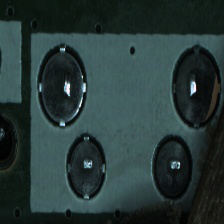

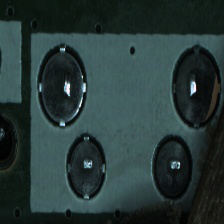

In [81]:
with h5py.File(get_filename, "r") as f:
    # 讀取數據集
    image_array1 = np.array(f["image1"])
    image_array2 = np.array(f["image2"])

# 創建PIL圖像對象
image1 = Image.fromarray(image_array1)
image2 = Image.fromarray(image_array2)

# 顯示圖片
image1.show()
image2.show()

In [101]:
ret = ds.update(filename=get_filename, dataset_token='651157bd007c9cb2a5bc5304124c397e',
            token='d45267baeccc084b608f455ab870774e', meta="it is a test 3 for gradio",
            overwrite=False,
            version=None)

2023-07-14 08:16:33,882 - cambrian.dataset/INFO - Use meta:it is a test 3 for gradio
2023-07-14 08:16:34,575 - cambrian.dataset/INFO - EOF uploaded dataset


In [84]:
ret

{'request': 'success',
 'datasetToken': '2f2c3a875c23895593706f9471731043',
 'version': 4,
 'size': 303104}

In [102]:
data_info_list = ds.get_private_dataset('d45267baeccc084b608f455ab870774e')
data_info_list

{'651157bd007c9cb2a5bc5304124c397e': {'owner': 'd45267baeccc084b608f455ab870774e',
  'name': 'input_picture',
  'metas': {'description': 'it is a test 3 for gradio'},
  'visible': 'private',
  'versions': [{'version': '1',
    'size': 453632,
    'meta': {'description': 'it is a test'},
    'createdTime': '2023-07-14T08:01:36'},
   {'version': '2',
    'size': 453632,
    'meta': {'description': 'it is a test 2 for gradio'},
    'createdTime': '2023-07-14T08:16:20'},
   {'version': '3',
    'size': 453632,
    'meta': {'description': 'it is a test 3 for gradio'},
    'createdTime': '2023-07-14T08:16:34'}]}}

In [87]:
ret = ds.get_info(dataset_token='2f2c3a875c23895593706f9471731043', token="gradio", version=None)
ret[1].text

'{"request":"success","url":"http://172.18.212.210:14000/webhdfs/v1/cambrian/DatasetMgrTest/gradio/input_picture/4/input_picture.h5?op=OPEN&offset=0&user.name=cambrian_dvc","filename":"input_picture.h5","size":303104,"version":"4","path":null,"storage_type":"HDFS"}\n'

In [90]:
ret = ds.update(filename=get_filename, dataset_token='2f2c3a875c23895593706f9471731043',
            token='gradio', meta="want to replace 2 66666",
            overwrite=False,
            version=None)

2023-07-14 07:49:47,912 - cambrian.dataset/INFO - Use meta:want to replace 2 66666
2023-07-14 07:49:48,632 - cambrian.dataset/INFO - EOF uploaded dataset


In [91]:
ret

{'request': 'success',
 'datasetToken': '2f2c3a875c23895593706f9471731043',
 'version': 5,
 'size': 303104}

In [93]:
data_info_list = ds.get_private_dataset('gradio2')
data_info_list

{'2f2c3a875c23895593706f9471731043': {'owner': 'gradio',
  'name': 'input_picture',
  'metas': {'description': 'want to replace 2 66666'},
  'visible': 'private',
  'versions': [{'version': '1',
    'size': 303104,
    'meta': {'description': 'it is a test'},
    'createdTime': '2023-07-12 07:08:36'},
   {'version': '2',
    'size': 303104,
    'meta': {'description': "{'it is a test 2'}"},
    'createdTime': '2023-07-13 01:35:57'},
   {'version': '3',
    'size': 303104,
    'meta': {'description': "{'want to replace 2'}"},
    'createdTime': '2023-07-13 01:36:58'},
   {'version': '4',
    'size': 303104,
    'meta': {},
    'createdTime': '2023-07-14 07:45:21'},
   {'version': '5',
    'size': 303104,
    'meta': {'description': 'want to replace 2 66666'},
    'createdTime': '2023-07-14 07:49:48'}]}}

In [169]:
ds.get_info(dataset_token='2f2c3a875c23895593706f9471731043', token="gradio", version=None)[1].text

'{"request":"success","url":"http://172.18.212.210:14000/webhdfs/v1/cambrian/DatasetMgrTest/gradio/input_picture/8/input_picture.h5?op=OPEN&offset=0&user.name=cambrian_dvc","filename":"input_picture.h5","size":453632,"version":"8","path":null,"storage_type":"HDFS"}\n'

In [46]:
ret = ds.delete(user_name='gallon_shih', dataset_token='2f2c3a875c23895593706f9471731043', token='gradio', version=4)
ret

{'status': 'success',
 'deleted': ['2f2c3a875c23895593706f9471731043'],
 'error': []}

In [25]:
ret = ds.get_public_dataset(token='d45267baeccc084b608f455ab870774e')

In [26]:
ret

{'759b232e1d7028532778fa9dcb63d0ca': {'owner': '4190e0ae5f015e149f60743b571bc4d1',
  'name': 'sticks_2020_1023_1627',
  'metas': {'general': {'image_count': {'train': 80,
     'validate': 20,
     'test': 0},
    'labeled_image_count': 100,
    'unlabeled_image_count': 0,
    'image_dataset_format': 'BGR888',
    'description': '500 training datasets for sticks',
    'application_type': '',
    'data_created': '2020-10-23T16:28:36.454153',
    'project_token': '4190e0ae5f015e149f60743b571bc4d1',
    'data_type': [],
    'module_name': [],
    'name': 'sticks_2020_1023_1627',
    'consensus': {}},
   'location': {'bu': [],
    'campus': [],
    'plant': [],
    'line': [],
    'station': []},
   'image': {'color_type': 'BGR888', 'image_resolution': {}},
   'manufacturing': {'product_name': [],
    'product_sku': [],
    'part_id': [],
    'part_number': []},
   'label': {'categories': [{'id': 1, 'name': 'barcode', 'supercategory': ''},
     {'id': 2, 'name': 'qrcode', 'supercategory': '

In [59]:
import requests

url = "http://172.18.212.157:31600/api/v1/dataset/2f2c3a875c23895593706f9471731043/permission"

headers = {
    "accept": "application/json",
    "Content-Type": "application/json"
}

data = {
    "owner": "gradio",
    "userName": "gallon_shih",
    "access": ["gradio3"]
}

response = requests.post(url, headers=headers, json=data)

# 检查响应状态码
if response.status_code == 200:
    # 请求成功
    print("请求成功")
    print(response.json())
else:
    # 请求失败
    print("请求失败")
    print(response.text)

请求成功
{'status': 'success', 'operation': 'add'}


In [77]:
url = "http://172.18.212.157:31600/api/v1/dataset/2f2c3a875c23895593706f9471731043"

headers = {
    "accept": "application/json",
    "Content-Type": "application/x-www-form-urlencoded"
}

data = {
    "token": "gradio",
    "filename": "input_picture.h5"
}
response = requests.put(url, headers=headers, data=data)

In [78]:
response.json()

{'url': 'http://172.18.212.210:14000/webhdfs/v1/cambrian/DatasetMgrTest/unfinished/gradio/input_picture/4/input_picture.h5?op=APPEND&data=true&user.name=cambrian_dvc',
 'id': 36732,
 'size': 0,
 'storage_type': 'HDFS'}

In [46]:
import requests
url = "http://cambrian-project-mgr-api-service.cambrian-platform/prjcfg/ProjectList_Owner_and_WhiteUser"
params = {
    "request": 'gallon_shih',
    "filter_solution": "true"
}
headers = {
    "Accept": "application/json"
}

response = requests.get(url, params=params, headers=headers)
project_list = response.json().get('PRJ_LIST', [])
project_list

[{'OWNER': 'gallon_shih',
  'NAME': 'gradio_gallon_shih',
  'TOKEN': 'd45267baeccc084b608f455ab870774e',
  'SUBS_TOKEN': 'af966b1c0976b263ee050c90d20469fd',
  'GROUP_TOKEN': 'c86fc1f35d479759',
  'ROLE': '1st'},
 {'OWNER': 'gallon_shih',
  'NAME': 'gallon_test',
  'TOKEN': '236d51d0ff949ed476fe76de57f578f7',
  'SUBS_TOKEN': 'af966b1c0976b263ee050c90d20469fd',
  'GROUP_TOKEN': 'c86fc1f35d479759',
  'ROLE': '1st'}]

In [103]:
import os

# 遍历并打印所有环境变量
for key, value in os.environ.items():
    print(f"{key}: {value}")

NPP_VERSION: 11.4.0.110
SHELL: /bin/bash
GPU_EXEC_FILE: /tmp/cam_exec_python_file
KUBERNETES_SERVICE_PORT_HTTPS: 443
NVIDIA_VISIBLE_DEVICES: 
DALI_BUILD: 2993096
CONTAINER_IMG_NAME: mcpdc-dockerhub.pegatroncorp.com/cambrian-dl-env/pega_pytorch_1.10.0__2.4.2_production_d45267baeccc084b608f455ab870774e:20230713082829
KUBERNETES_SERVICE_PORT: 443
CUSOLVER_VERSION: 11.2.0.120
no_proxy: .cambrian-platform-staging,.cambrian-platform,.pegatroncorp.com,localhost,127.*,10.*,172.18.*,172.22.*,172.24.*,172.26.*,172.28.*,172.29.*,172.30.*,192.168.*,*.pegatron,*.pegatroncorp.*,*.unihancorp.*,*.purecsr.com.*,*.puregms.com.*,*.purelean.com.*,*.asfly.com.*,*.fy-tec.com*,*.fytec.corpnet,*.ch.corpnet,*.ri-kuan.com.*,*.ri-teng.com.*,*.casetekcorp.com*,*.casetek.com.*,*.casetek.net,tw.asrock.com,forum.asrock.com,*.ptc.com,*.local,*.intra,*.asrockind.com,*.asrockrack.com,*.asrock.com.tw,mis.help,*.pegatw.com,*.PTB-Branch.com,outlook.office.com,outlook.office365.com,pegatroncorp-my.sharepoint.com,pegatronco